<a name='haut'></a>
<center>
    <img src="images/scikit-learn-logo.png" width="40%" />
    <h1>Introduction à Scikit-Learn</h1>
</center>

Documentation complète disponible en suivant [ce lien](http://scikit-learn.org/stable/index.html). En particulier le schéma [ici](https://scikit-learn.org/stable/tutorial/machine_learning_map/) done une vue assez graphique des possibilités de la librairie.

---

[Scikit Learn](#scikit)
- [Présentation](#presentation)
- [Logiciels Python pour l'analyse de données](#logiciels)

[Algorithmes implémentés dans Scikit-Learn](#algos)

[Données fournies par Scikit-Learn](#donnees)

[Données externes](#externe)

[API unifiée](#api)

[Pipelines](#pipeline)

---


In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.max_open_warning"] = -1

import numpy as np
np.set_printoptions(precision=3)

from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {'width': 1440, 'height': 768, 'scroll': True, 'theme': 'simple'})

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

<a name='scikit'></a>
# Scikit-Learn
[[Retour](#haut)]

<a name='presentation'></a>
## Présentation
[[Retour](#haut)]

* Bibliothèque de fonctions d'analyse de donnés et de Machine learning en Python
* Simple et efficace, bien établie
* De nombreux contributeurs
*  <a href="http://scikit-learn.org/dev/documentation.html">Documentation</a> et <a href="http://scikit-learn.org/dev/auto_examples/index.html">Exemples</a>
* Licence BSD 3

<a name='logiciels'></a>
## Logiciels Python pour l'analyse de données
[[Retour](#haut)]

 <center><img src="TP0-pydata_stack.png" /></center>

<a name='algos'></a>

## Algorithmes implémentés dans Scikit-Learn
[[Retour](#haut)]

### Apprentissage supervisé

* Modèles linéaires (Ridge, Lasso, Elastic Net, ...)
* SVM
* Méthodes à base d'arbre (arbres de décision, forêts aléatoires, bagging, GBRT, ...)
* Plus proches voisins
* Réseaux de neurones
* Processus gaussiens
* Sélection de variable

### Apprentissage non supervisé

* Clustering (KMeans, hiérarchique, ...)
* Réduction de dimension linéaire (PCA, ICA, ...) et non linéaire (ISOMAP, LLE,..)
* Estimation de densité
* Détection de points aberrants.

### Sélection et évaluation de modèles 

* Validation croisée
* Grid-search
* Métriques

### ...

<a name='donnees'></a>

## Données fournies par Scikit-Learn
[[Retour](#haut)]

Ensemble d'apprentissage ${\cal L} = (X, y)$ où :
* les exemples sont donnés sous la forme d'un tableau (Numpy ou matrice éparse Scipy) $X$ de taille `n_samples` $\times$ `n_features` à valeurs dans  ${\cal X}$;
* les sorties (labels, valeurs réelles) $y$, à valeurs dans ${\cal Y}$.

Classification supervisée : construire $\varphi_{\cal L}: {\cal X} \mapsto {\cal Y}$ minimisant

$$
Err(\varphi_{\cal L}) = \mathbb{E}_{X,Y}\{ L(Y, \varphi_{\cal L}(X)) \}
$$

avec $L$ fonction de perte, par exemple $L_{01}(Y,\hat{Y}) = 1(Y \neq \hat{Y})$.

Les algorithmes Scikit-learn sont vectorisés.

In [2]:
# Exemple
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=20, random_state=123)
labels = ["b", "r"]
y = np.take(labels, (y < 10))
print(X) 
print("Taille de X : ",X.shape)
print("5 premières composantes de y : ", y[:5])
print("Taille de y : ",y.shape)


[[-6.453 -8.764]
 [ 0.29   0.147]
 [-5.184 -1.253]
 ...
 [-0.231 -1.608]
 [-0.603  6.873]
 [ 2.284  4.874]]
Taille de X :  (1000, 2)
5 premières composantes de y :  ['r' 'r' 'b' 'r' 'b']
Taille de y :  (1000,)


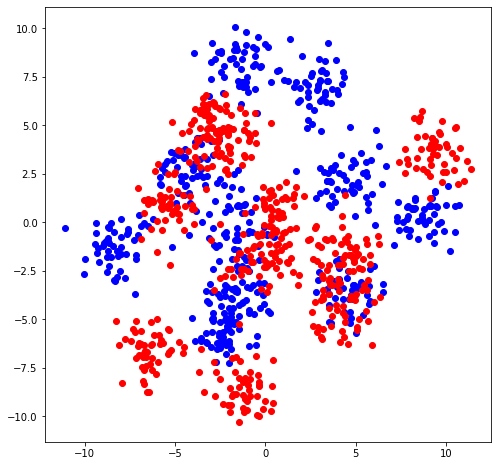

In [3]:
# Affichage
plt.figure()
for label in labels:
    mask = (y == label)
    plt.scatter(X[mask, 0], X[mask, 1], c=label)
plt.show()

<a name='externe'></a>

### Données externes
[[Retour](#haut)]

- Numpy fournit des  [fonctions](https://docs.scipy.org/doc/numpy/reference/routines.io.html) pour le chargement de fichiers clssiques  (CSV, txt,...);

- Pandas fournit des [outils](http://pandas.pydata.org/pandas-docs/stable/io.html)  pour des données structurées (CSV, JSON, Excel, HDF5, SQL, ...);

<a name='api'></a>

## API unifiée
[[Retour](#haut)]

Tous les algorithmes de Scikit-learn partagent une API commune composée des interfaces suivantes :

- un `estimateur` pour construire et fitter le modèle;
- un `predicteur`  pour faire des predictions;
- un `transformeur` pour convertir les données.


### Estimateur

In [4]:
class Estimator(object):
    def fit(self, X, y=None):
        # Apprend le modèle sur les données
        return self

Exemple d'application

In [5]:
from sklearn.neighbors import KNeighborsClassifier                                     

# Paramètre de l'algorithme
clf = KNeighborsClassifier(n_neighbors=5)

clf.fit(X, y)

KNeighborsClassifier()

Andreas Mueller (contributeur scikit-learn) a proposé ce diagramme permettant de résumer les choix possibles d'algorithmes.

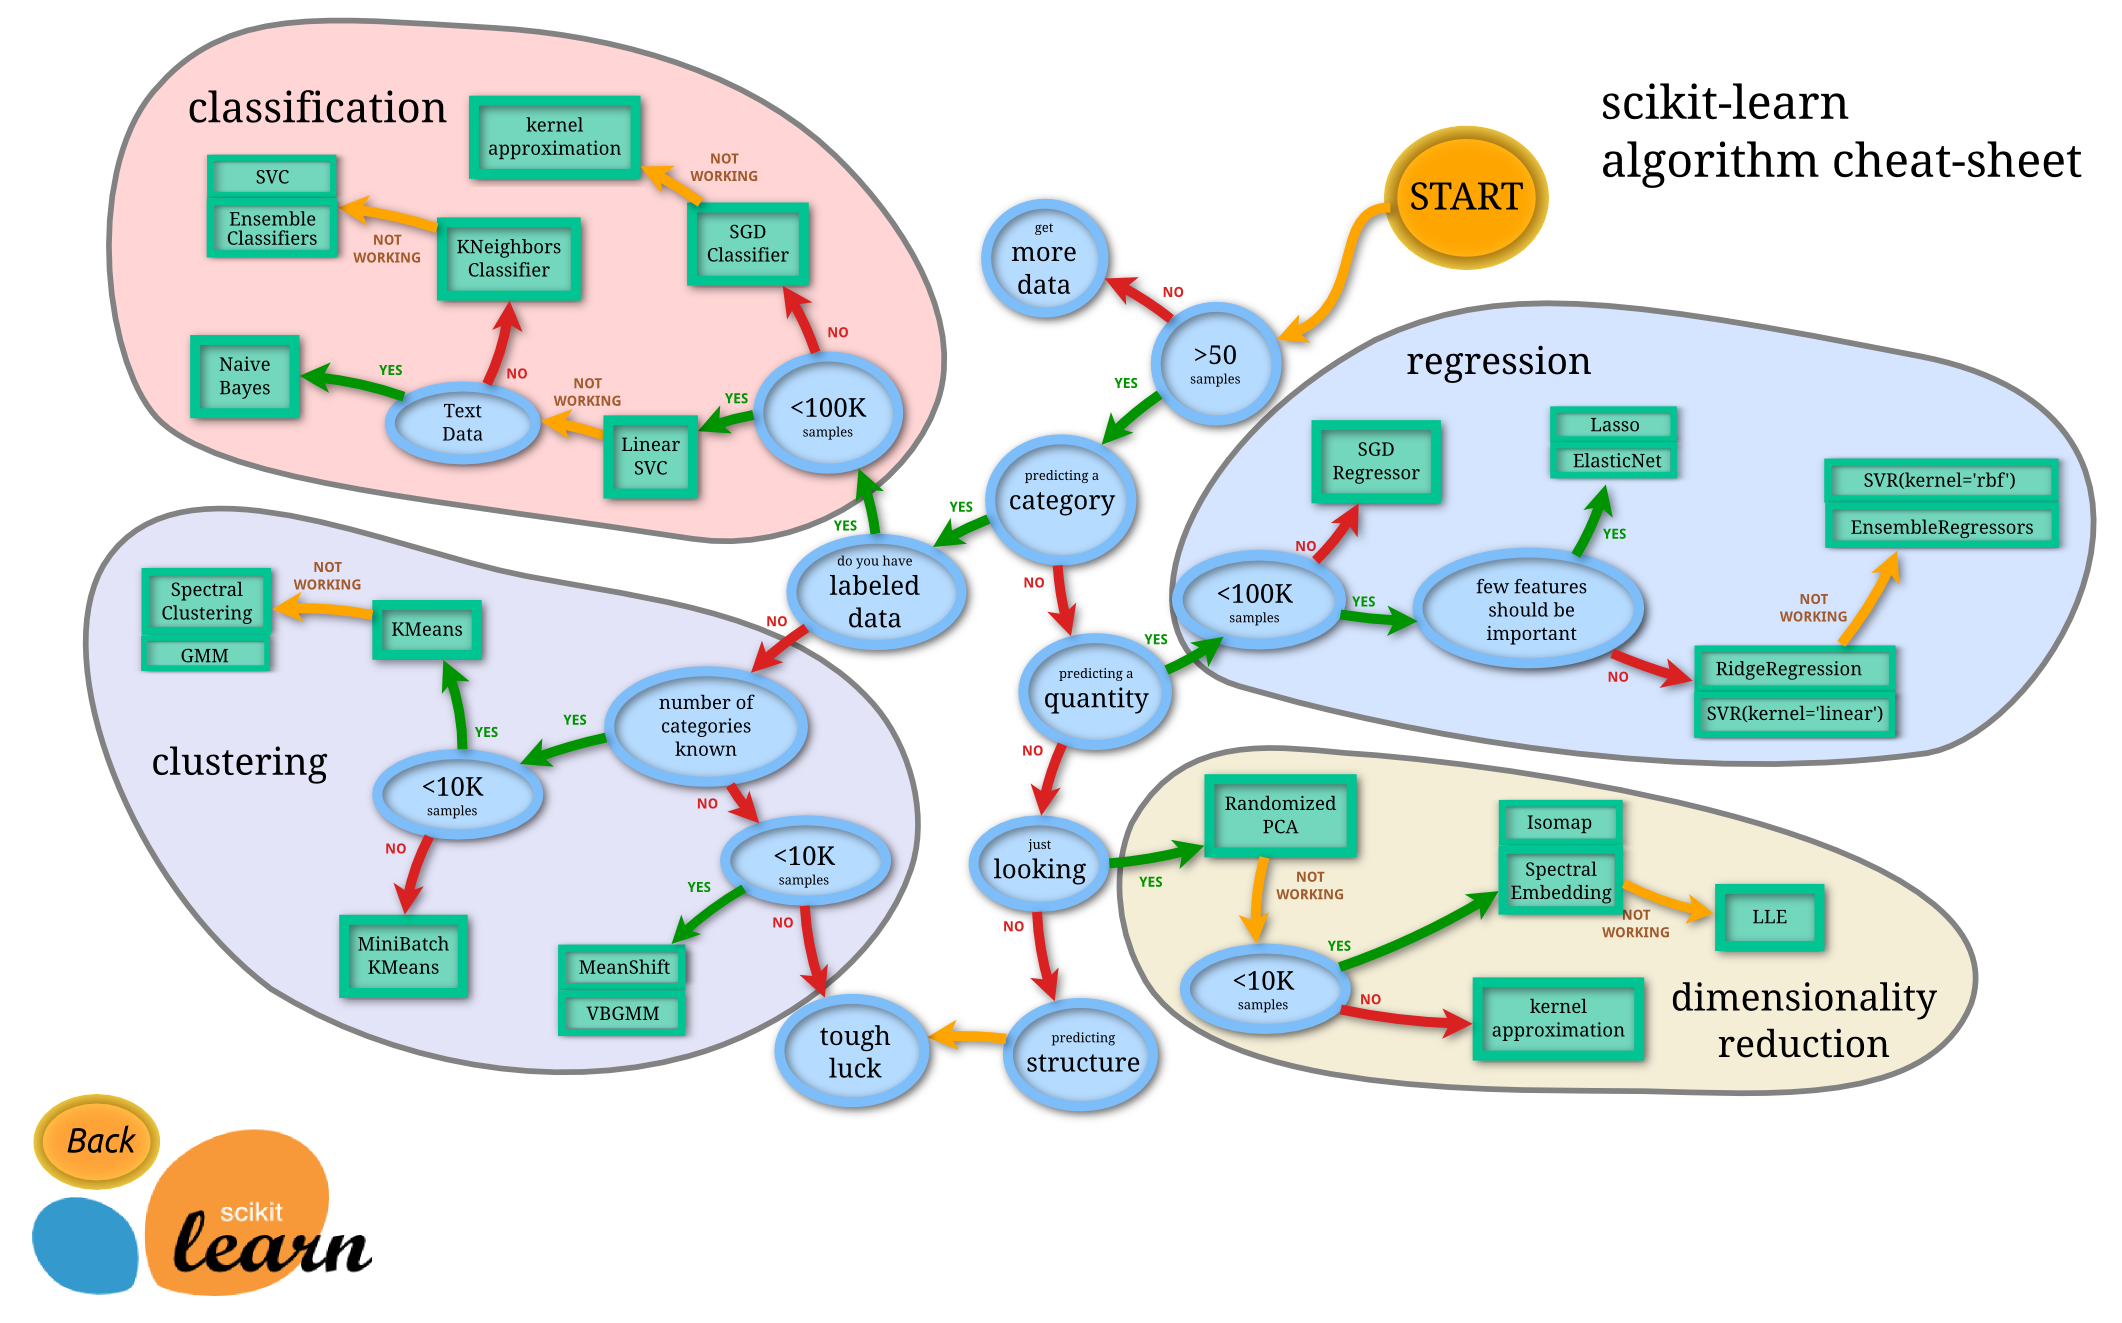

In [7]:
from IPython.display import Image
Image("TP1-flowchart.png")

### Predicteur

In [8]:
print(clf.predict(X[:5])) 

['r' 'r' 'r' 'b' 'b']


In [9]:
# Probabilité des classes
print(clf.predict_proba(X[:5]))

[[0.  1. ]
 [0.  1. ]
 [0.2 0.8]
 [0.6 0.4]
 [0.8 0.2]]


### Transformeur

La plupart du temps, les données d'entrées doivent être pré-traitées pour une application efficace de l'algorithme de machine learning

In [10]:
class Transformer(object):    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        """Transforme X en Xt."""
        return Xt
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        Xt = self.transform(X)
        return Xt

In [11]:
# Illustration sur des données image : chiffres manuscrits.
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

__Normalisation__

In [12]:
from sklearn.preprocessing import StandardScaler
tf = StandardScaler()
tf.fit(X_train, y_train)
Xt_train = tf.transform(X_train)  

# Importance du scaling pour certains algorithmes
from sklearn.svm import SVC
clf = SVC()
print("Score sans scaling =", clf.fit(X_train, y_train).score(X_test, y_test))
print("Score avec scaling =", clf.fit(tf.transform(X_train), y_train).score(tf.transform(X_test), y_test))

Score sans scaling = 0.9911111111111112
Score avec scaling = 0.9844444444444445


__Sélection de descripteurs__

In [13]:
# Selection des 10 meilleurs descripteurs d'après le F-score de l'ANOVA
from sklearn.feature_selection import SelectKBest, f_classif
tf = SelectKBest(score_func=f_classif, k=10)
Xt = tf.fit_transform(X_train, y_train)

<a name='pipeline'></a>
# Pipelines
[[Retour](#haut)]

Les transformeurs peuvent être enchaînés pour former des pipelines. Le pipeline peut contenir des classifieurs en bout de chaîne pour former une chaîne de traitement complète.

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier


clf = Pipeline(steps=[('scaler',StandardScaler()),
                        ('kbest',SelectKBest(score_func=f_classif, k=10)), 
                        ('class',RandomForestClassifier())])
clf.fit(X_train, y_train)
print(clf.predict_proba(X_test)[:5])
print("K =", clf.get_params()["kbest__k"])

[[0.   0.   0.69 0.02 0.   0.04 0.   0.2  0.05 0.  ]
 [0.01 0.   0.   0.   0.01 0.01 0.02 0.03 0.91 0.01]
 [0.   0.09 0.79 0.04 0.   0.   0.   0.02 0.06 0.  ]
 [0.   0.   0.   0.   0.   0.01 0.99 0.   0.   0.  ]
 [0.   0.   0.   0.   0.02 0.01 0.97 0.   0.   0.  ]]
K = 10
